In [13]:
library(dplyr)
library("ggpubr")
samples<-read.csv("./named/y_cruncher_8*c4.xlarge_25m100runs_labeled.csv")

# analyze set by set
### description:
set 1 contains 160 entrys generated from VM 1~16<br>
set 2 contains 150 entrys generated from VM 2~16<br>
.
.
.<br>
set 16 contains 10 entrys generated from VM 16<br>

each entry present 25,000,000digits*10runs of y-cruncher<br>

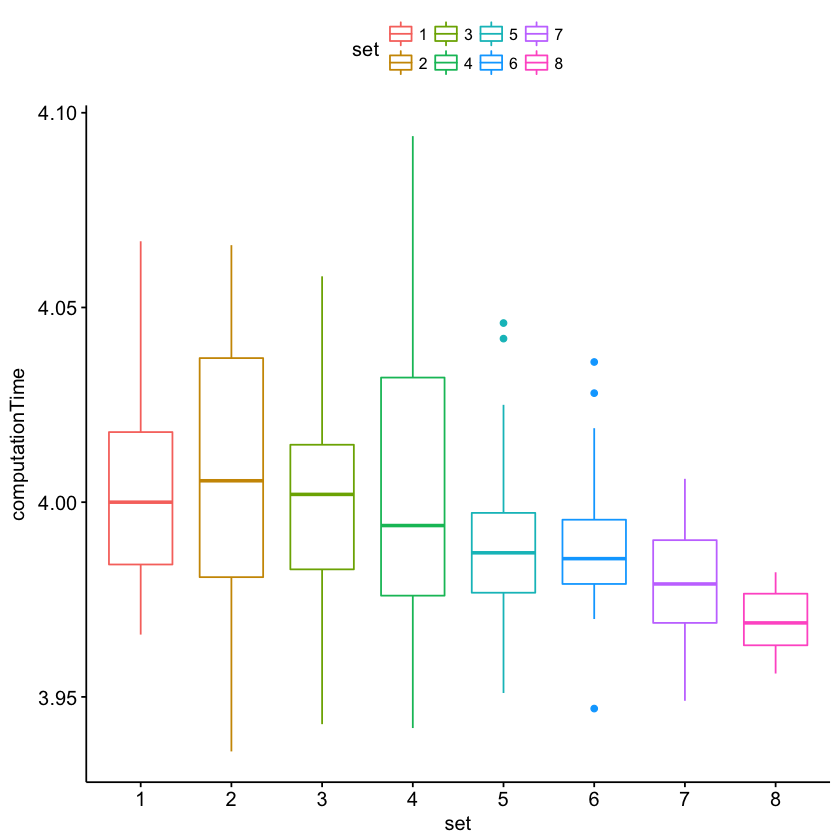

In [14]:
ggboxplot(samples, x = "set", y = "computationTime", 
          color = "set", 
          ylab = "computationTime", xlab = "set")

### calculations on each set 

In [15]:
statistic_result=data.frame()
for(i in 1:8){
    set=samples[samples$set==i,'computationTime']
    statistic_result=rbind(statistic_result,c(range(set),mean(set),median(set),var(set),i))
}
names(statistic_result)<-c('min','max','mean','median','var','set')
statistic_result

min,max,mean,median,var,set
3.966,4.067,4.003163,4.0000,5.775809e-04,1
3.936,4.066,4.007314,4.0055,1.081813e-03,2
3.943,4.058,3.999833,4.0020,6.227175e-04,3
3.942,4.094,4.002580,3.9940,1.087840e-03,4
3.951,4.046,3.987425,3.9870,3.955327e-04,5
3.947,4.036,3.989400,3.9855,3.196966e-04,6
3.949,4.006,3.978500,3.9790,2.068947e-04,7
3.956,3.982,3.969200,3.9690,8.573333e-05,8


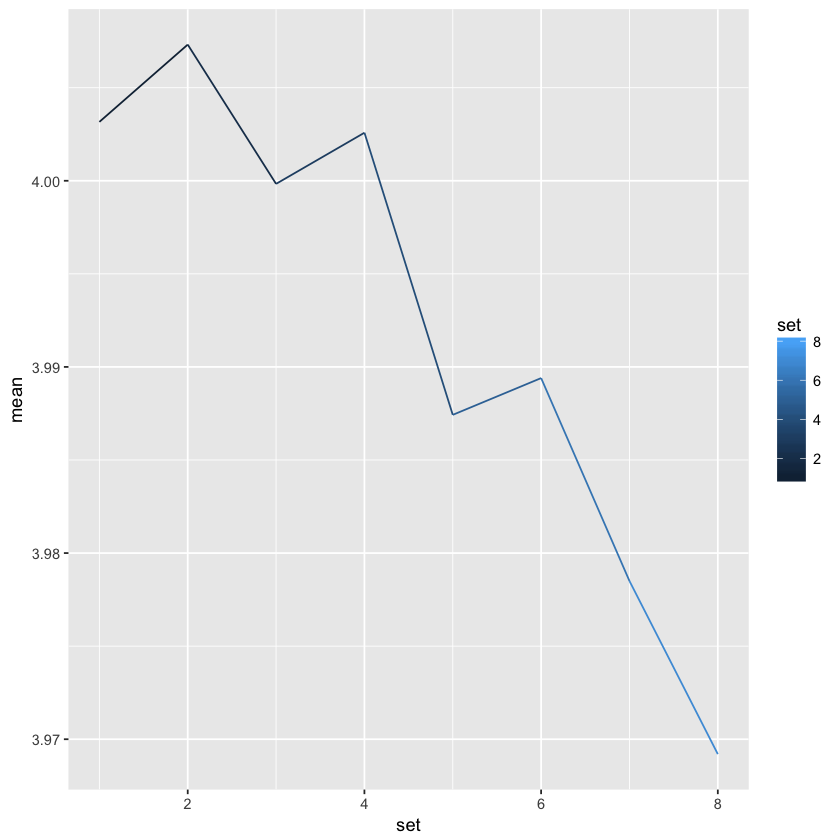

In [16]:
ggplot(statistic_result, aes(x = set, y = mean, colour = set)) +
geom_line()

###  percentile

In [17]:
q=data.frame(quantile(samples$computationTime,c((1:10)/10)))
names(q)<-c('computationTime')
q

,computationTime
10%,3.9670
20%,3.9750
30%,3.9807
40%,3.9860
50%,3.9920
60%,4.0010
70%,4.0080
80%,4.0250
90%,4.0400
100%,4.0940


In [18]:
p<-data.frame(c((1:10)/10))
names(p)<-c('percentile')
q<-cbind(q,p)
q

,computationTime,percentile
10%,3.9670,0.1
20%,3.9750,0.2
30%,3.9807,0.3
40%,3.9860,0.4
50%,3.9920,0.5
60%,4.0010,0.6
70%,4.0080,0.7
80%,4.0250,0.8
90%,4.0400,0.9
100%,4.0940,1.0


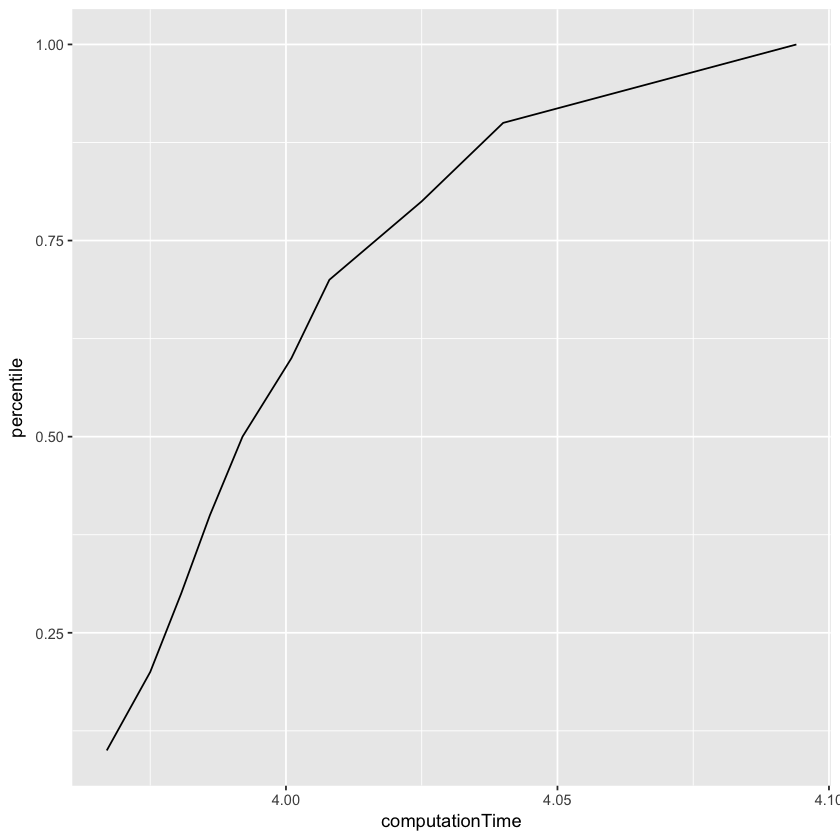

In [19]:
ggplot(q, aes(x =computationTime , y=percentile)) +
  geom_line()

# Another perspective - VM dimension 

###  VM No.16

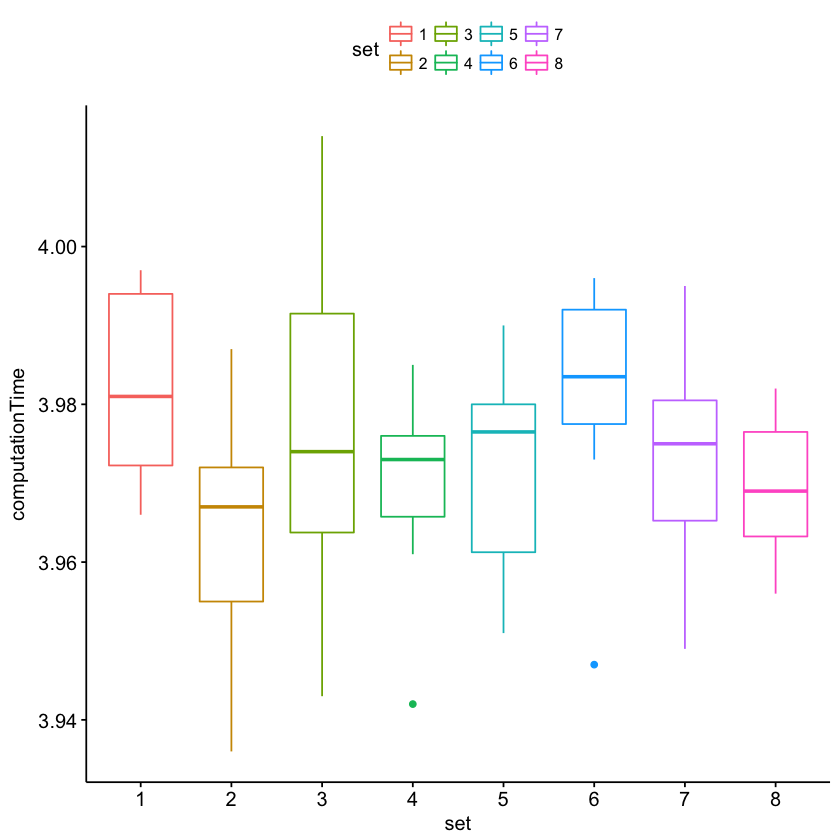

In [20]:
samples<-samples[samples$vmID==8,]
ggboxplot(samples, x = "set", y = "computationTime", 
          color = "set", 
          ylab = "computationTime", xlab = "set")

#### statistic_result of VM No.16

In [22]:
statistic_result=data.frame()
for(i in 1:8){
    set=samples[samples$set==i,'computationTime']
    statistic_result=rbind(statistic_result,c(range(set),mean(set),median(set),var(set),i))
}
names(statistic_result)<-c('min','max','mean','median','var','set')
statistic_result

min,max,mean,median,var,set
3.966,3.997,3.9823,3.9810,1.446778e-04,1
3.936,3.987,3.9635,3.9670,2.227222e-04,2
3.943,4.014,3.9771,3.9740,4.849889e-04,3
3.942,3.985,3.9701,3.9730,1.463222e-04,4
3.951,3.990,3.9724,3.9765,1.764889e-04,5
3.947,3.996,3.9815,3.9835,2.062778e-04,6
3.949,3.995,3.9739,3.9750,1.861000e-04,7
3.956,3.982,3.9692,3.9690,8.573333e-05,8


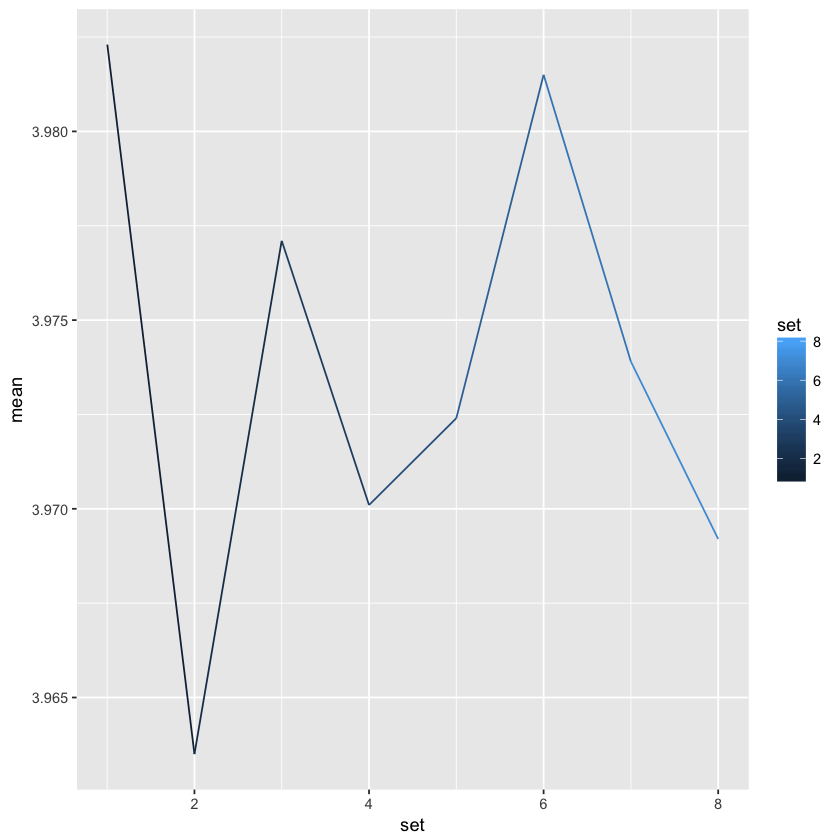

In [23]:
ggplot(statistic_result, aes(x = set, y = mean, colour = set)) +
geom_line()

#### percentile of VM No.16

In [13]:
q=data.frame(quantile(samples$computationTime,c((1:10)/10)))
names(q)<-c('computationTime')
q

,computationTime
10%,7.2259
20%,7.2776
30%,7.3275
40%,7.3550
50%,7.3660
60%,7.4260
70%,7.6516
80%,7.6740
90%,7.7093
100%,7.8000


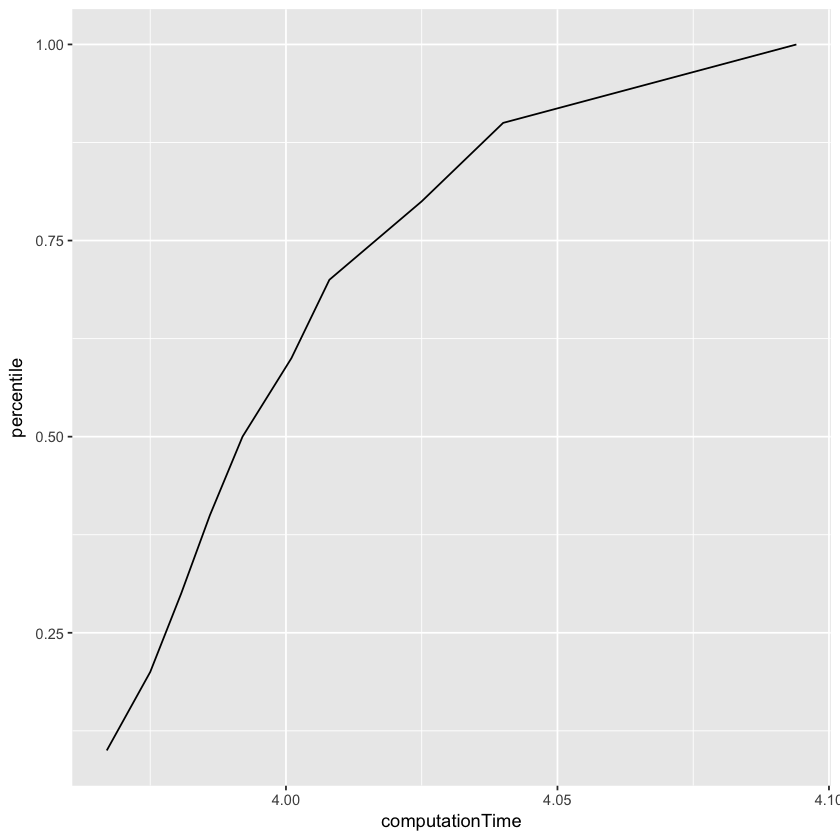

In [24]:
p<-data.frame(c((1:10)/10))
names(p)<-c('percentile')
q<-cbind(q,p)
ggplot(q, aes(x =computationTime , y=percentile)) +
  geom_line()